##### 產生器 generator
當 Python 的程式需要迭代內容非常大的串列時，往往會消耗不少電腦的記憶體，這時如果改用「產生器」的方式，\
就能產生更好的效能，這篇教學將會介紹 Python 的產生器 ( generator )。

##### 什麼是產生器 generator？ 
產生器是一個 Python 序列製作物件，可以用它來迭代一個可能很大的序列，在迭代的過程中所產生的值都是動態的，\
不需要將整個序列儲存在記憶體中。

##### 產生器的特性 
* 產生器是記錄「產生值的方法」，而不是記錄值。
* 使用產生器中「產生的值只能取用一次」，無法重新啟動或重新取得 ( 因為不會紀錄 )。

##### 產生器表示式 
在「[生成式](https://steam.oxxostudio.tw/category/python/basic/comprehension.html)」的文章裡有介紹過串列的生成式，而產生器表示式跟生成式的格式很像，差別在於將中括號「[]」改成小括號「()」，\
執行後可以看到產生器會回傳一個產生器物件 object，而不是串列。

In [ ]:
a = [i for i in range(10)]  # 串列生成式
b = (i for i in range(10))  # 產生器表示式
print(a)   # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
print(b)   # <generator object <genexpr> at 0x7fbb6facba50>

和串列相同，也可以使用類似 for 迴圈的方式取出產生器的值，但所有的值都只能取出一次，\
以下方的程式為例，如果是串列生成式，因為記憶體中保留了整份串列，所以再次取值時還是能得到數值，\
如果是使用產生器表示式，再次取值時，就完全取不到值。

In [ ]:
a = [i**2 for i in range(10)]
for i in a:
    print(i, end=' ')    # 0 1 4 9 16 25 36 49 64 81
for i in a:
    print(i, end=' ')    # 0 1 4 9 16 25 36 49 64 81
print()
b = (i**2 for i in range(10))
for i in b:
    print(i, end=' ')    # 0 1 4 9 16 25 36 49 64 81
for i in b:
    print(i, end=' ')    # 取不到值

此外，也可使用「next」的方法依序取值，但如果最後取不到值就會發生錯誤。

In [ ]:
a = (i**2 for i in range(10))  # 串列生成式
print(next(a))  # 0
print(next(a))  # 1
print(next(a))  # 4
print(next(a))  # 9
print(next(a))  # 16
print(next(a))  # 25
print(next(a))  # 36
print(next(a))  # 49
print(next(a))  # 64
print(next(a))  # 81
print(next(a))  # 發生錯誤，因為取不到值

##### yield 陳述式 
如果一個函式裡，包含 yield 陳述式，那麼這個函式就會變成一個產生器 ( generator 函式 )，舉例來說，\
下方的程式是一個基本的函式，執行後會依序印出對應的數字。

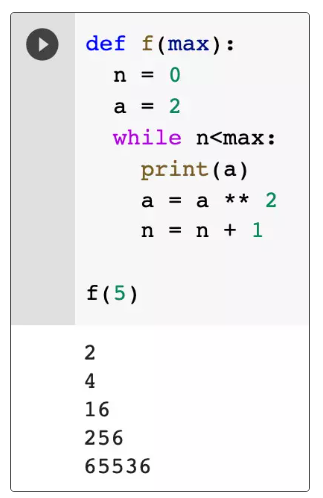

In [ ]:
def f(max):
    n = 0
    a = 2
    while n<max:
        print(a)
        a = a ** 2
        n = n + 1
f(5)

如果將 print 的部分換成 yield，印出結果就會看見已經變成 generator。

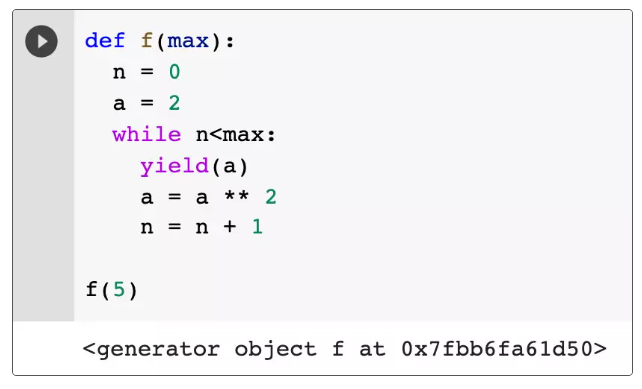

In [ ]:
def f(max):
    n = 0
    a = 2
    while n<max:
        yield(a)     # 換成 yield
        a = a ** 2
        n = n + 1
f(5)

generator 函式和普通函式的執行流程不同。普通函式是順序執行，遇到 return 語句就會返回。\
而 generator 函式會在每次調用 next() 的時候執行，遇到 yield 語句返回，\
再次執行時從上次返回的 yield 語句處繼續執行。

舉例來說，下方程式碼是一個普通函式，呼叫函式執行後，會一次印出 1、2、3。

In [ ]:
def f():
    print(1)
    print(2)
    print(3)
f()    # 一次印出 1、2、3

如果使用 yield 將其變成產生式，就需要使用 next 或是迴圈方式調用，每次呼叫時才會逐步印出 1、2、3

In [ ]:
def f():
    yield(1)       # 使用 yield
    yield(2)
    yield(3)
g = f()          # 賦值給變數 g
print(next(g))   # 1
print(next(g))   # 2
print(next(g))   # 3

為什麼上方的程式碼要使用「g = f()」呢？因為調用 generator 函式會建立一個 generator 物件，\
多次調用generator 函式會創建多個「相互獨立」的 generator，如果將程式碼改成下面的模樣，\
因為 generator 函式互相獨立，結果就只會印出 1。

In [ ]:
def f():
    yield(1)
    yield(2)
    yield(3)
print(next(f()))   # 1
print(next(f()))   # 1
print(next(f()))   # 1

下方的程式碼，使用 for 迴圈依序取出 generator 函式所運算的數值，並將數值分別放入兩個串列當中。

In [ ]:
def f(max):
    n = 0
    while n<max:
        yield(n)
        n = n + 1
g = f(10)
a = []
b = []
for i in range(5):
    a.append(next(g))
for i in range(5):
    b.append(next(g))
print(a)     # [0, 1, 2, 3, 4]
print(b)     # [5, 6, 7, 8, 9]

##### 使用產生器找質數 
如果要快速找出一群數字裡的質數，可以使用「埃拉托斯特尼篩法」來尋找，埃拉托斯特尼篩法的原理就是「依序將找到的質數的倍數剔除」，\
因此每次找到質數之後，要尋找的數字就會變少，所以可以快速找出質數。

根據這個法則，可以簡單撰寫出下方的程式碼，在尚未使用 generator 函式的時候，必須要一個一個依序撰寫，在數字量大的時候相當沒有效率。

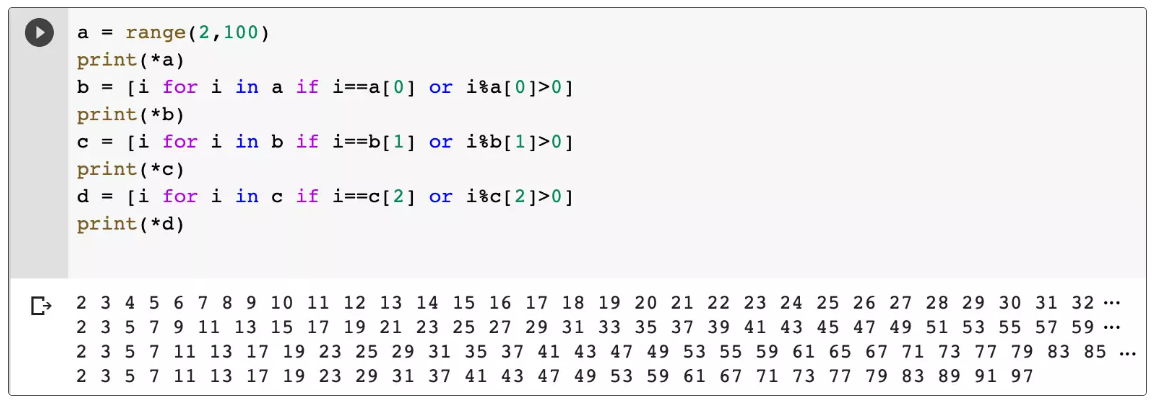

In [ ]:
a = range(2,100)                            # 產生 2～100 的串列
print(*a)
b = [i for i in a if i==a[0] or i%a[0]>0]   # 找出第一個質數，並將串列裡該質數的倍數剔除
print(*b)
c = [i for i in b if i==b[1] or i%b[1]>0]   # 找出第二個質數，並將串列裡該質數的倍數剔除
print(*c)
d = [i for i in c if i==c[2] or i%c[2]>0]   # 找出第三個質數，並將串列裡該質數的倍數剔除
print(*d)

如果改成 generator 函式，就可以比較輕鬆的找出全部的質數。

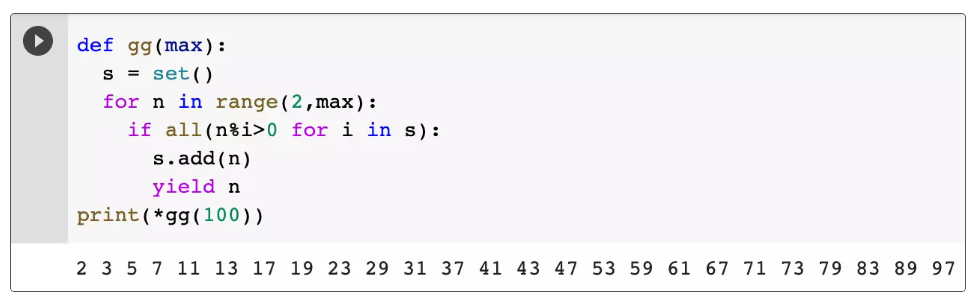

In [ ]:
def gg(max):                   # 定義一個 gg 函式
    s = set()                    # 設定一個空集合
    for n in range(2,max):       # 從 range(2, max) 當中開始依序找質數
        if all(n%i>0 for i in s):  # 判斷如果 i 已經存在於集合，且除以集合中的值會有餘數 ( 整除表示非質數 )
            s.add(n)                 # 將該數字加入集合 ( 表示質數 )
            yield n                  # 使用 yield 記錄狀態
print(*gg(100))                # 印出結果